In [1]:
import os
import pathlib
import urllib

import PIL.Image as Image

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# this info comes from the documentation of the model in tf hub: check the model_url link
IMAGE_SHAPE = (224, 224)

model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

# load the model from tf hub
classifier = Sequential([hub.KerasLayer(model_url,
                                        input_shape=IMAGE_SHAPE+(3,))]) # here add the 3rd dimension for the channel

In [3]:
# the original classes of the classifier
imagenet_labels_url = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
file = urllib.request.urlopen(imagenet_labels_url)

imagenet_labels = []

for line in file:
    imagenet_labels.append(line.decode("utf-8")[:-1])

print(len(imagenet_labels))    
    
imagenet_labels[:10]

1001


['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

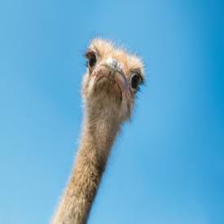

In [4]:
# Try the model with some image from the web
urllib.request.urlretrieve(
    "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBw8PDw8PDw8PDg8PDw8PDw8QDw8PDw0NFREWFhURFRUYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGBAQFy0fHyAtLS0vLSsrLS0tKy0tLS0tLS0tLS0tLS0tLS8tLSstLS0tLS0tLSsrLS0tLSstLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAADAQADAQAAAAAAAAAAAAABAgMABAUGB//EADQQAAICAAQEBAQGAgIDAAAAAAABAhEDBBIhBTFBURMiYXEGgZGhMrHB0eHwQlJy8QcUI//EABoBAAIDAQEAAAAAAAAAAAAAAAECAAMFBAb/xAAiEQEBAAICAgICAwAAAAAAAAAAAQIRAwQSITFBBRMiQlH/2gAMAwEAAhEDEQA/APQGMA23nmFYwGECgCAiMBmMECgGYAgBjGIDUag0GiJoEh0jJDJEGRkg0GjAHQUahgAEKBQwAoVoVjMDIBGibRRisYqMkTmi8kSkhoSxx5IlNHIkiUkNFVjjyRGSOTJEZDRXYiyckVkTkMSpUYajBJp7MAWA4mqAAsAUBgYQMKFZjMBAYAQBBggCRBQyFQWwCdDISEJPdJvZv6FZYM1zXoxfKfGzzjy1vQGG0MzRNp40pjGCUABAFAYrGYrIBWKx2KEE2TkizROSGhKhJEpo5EiMxorrjyIyLzIyHiqoyJSKzJSHinKkMEwQeyAMA4WqUDGYrCgMAQMKAAICAAAgCDBQEMQGsvkMPXJbpd7aVL2OFj2laTfpZ5fiXHMzhzcYxUNNtOUVLV6LfZ/ycva5v14evmu7pcE5M92+o+qQ8LCfhtrdKn0vopev5nYYkMOUV5U+/tyPkPw/8VY+ak8rjNTbjKWG2oveKvSpKmn+x7fguexnFYc1LV/s99SvZmByZ54+9vQ4YY309BicOg997rl0f8nU5zK6W9t+b7RXZHfYUZz2TqtlX5knOEZOMlyfVO7a3LuPuZYXd+FPJ1cc5qPOywH12SSfqRlh1/PY9RjrDkn5effr8voddicNc7ad1Wz6Jndxd/HK6rg5fx1mO46RsB2eJwrEVyavql+SOA8Ca5qttzuw5sM/is/k6+eHzEgMZgLnORijsVhArJyKMSQ0LUpEZl5EZjRXUJkJnImQmPFOTjzJSZaZBlkc+VAwDE0Hk9sKxgM4WwRgYzQrQQKAZisIAxQgCWsAxggIUKGyCEr/ALt9zzHxRl8fFwMVKMttDjFqNSjvqUZdX+Hbtex67L4DxHpXM5PxDwuX/qxwoyubxYtc7Tr+Tg73LMcNb9tL8fxW5+WvT53/AOPPhbEnjwxcTVFR83Pm2uvVL1PremODvHD8WX+2qMVv2T3OkUp5PAuOG6jFrEm4x14mI/w6V067duZ5vH41iLEbnNym6XhrU2l7JbGJll5N/Hj8Xu8v8WxhqhPDeHK6trZtvujg8X49JytLbElpWmpQpLzN9UeE4lxibjpjaxHsk+nrvzJ5XPa8TSpSglHzuOzk6+w2Gdk9qssPfp9Vy8sOUXpltHSruP4qTarsSy2bqUoy5dPZOvr+54bEx8xhacSE/Ehh8k0tVVXmraSOdm+KeLBTg1GE7WzVqSW8V17FWeE9ZYxdhl6sye4jxOHJO66Xt82cTO4uFjJ1OLa5pNb+6W7PknGOIwy6UZ47lN7xwowWJLDT/wBuSX3OT8H/ABXGONpntGacVWpxlL0T5Pfkzo4/PC725+TxymtPYS5tc/WmvzMNiYqk9Stp79aFPQ4XeMea5JrKwrAxmKx1ZWJIdiSGhalIlMrIlMaKqjMhMvMhMeK8kMQhIvMhMsjmzIY1GCre3AExntsrQGhgBRNoRos0I0EtiTAUaEaGLYUATBKxrMYgx2fBaUr5vp2o5mFirMY9NPRD0qLZweHLUmkknzb3WwcTNywYz5J8klz/AOjB72V/Y9H0sZOKOu+O+MRU44UG1S06k6cG+bXrVHhp8RjhqSwoJO9pPecn3s5XGlLGxddPZuue7ZxHklbcqtfr+pxfLtcLMZqc617t0v8Aj6jZZyc7jJxjvs3e3Re+33EzGWepST8vL3DLVHflX7EGO64fxCSWz2T0yi23TSFhiVraXlbUqul+JKv49Dq8jiaseMbSU4yT7urcf1O4eBFucGttovo0mvx/qW4ZamqGU8vbw3xBqlmsVytNzv5Plv1PRcI4FiYuHHTopTU5bptTXJNdOf3OVh4M8bTCbhUdnJwUm4d0er4Vw2GErw2/Nu7epSfe+ZodXhnJd5fEZXc57xzxx+atw7DlGCjK00vlfozmmSMakmvUZFtt3SsVjsVhKRk5FGJIaEqUiUisiUhldRmRmWkSmh4ryceZGSLzRGSLI5s4kYJhlb2wBjGc2ygGARCsDQwKCBGhWilCtBTSTQtFWhWhtksTMhmgUErn8MtO6T92lRwONTWq657bWzkZF+au/Ujx16Vd17/uZPfk3tufj7/F5vN4iVqLr8/mdZPaSTd36/VnJlLzNtUr7rcfCwIybk41+favQy9NRx5wtU1/eb/vqSzOWck9/wDX7L+TsZPZWqSjz7uv5OFKTTfZp3y2abQdBtxeFZVeOsRr8C236uzsuJY2iUKtanV86a79wYWmK1cm3y+pHPYjnS7bp/kPjC26dxkMCpW0mqvkrVnfYKVKlXsdfksPZdHz+vNf3sdnBG51sPDjjA7efnyNQGMBnQ5SMVjsRhKVk5DyJyGhanIlIpInIaK6lIjItIlIeEqMyMkciSJSQ8UZRBow2kIynT2ZqDRjObZTDAoKFFoegBAgGOBkAjQrQ7RqCidA0lKBQdh4uRw3B3v6HH+IsO4vlGlvdWdlkMOuqX3Or+I4uca0xe3+Se7XoYne5N5PQdHj1g8xhYMXOk+e189+9v8ARHYxyabrSqT5u1TXKvqvudbksNqe6UZLkqVrbmdn4/laW20oupda9OpwbdunUZyD1c+my250nt8jqpy8z9n/ACdlxPFV7Vs6tdNqX5HX5fCcpKO+73fYtxmyZenMy2Wlib1arp3O8wuEqveyfDcpoex30I7GxwdbGY7s9sbs9rLy1jfTj5TA0pJ77HJCCztZ22AaxWyJtmIwtisMLSyJSHkychoSkkSkUkJIYlSkTkirEY0JUmickVaFaGiuxCjFKCNsni9dQKGoxntYpg0agoVoWh6A0ECUahqBRAJRqGo1BQrQcJK9/pVmZbLYGprp32dC55SQ/HjcspI5kUlG1t358jquJzqvNF+jTbrt3s5udx3Hyp0uj6e9/odPKPiK4Olu296bSt1t1o8zz8nnnbHqOHDxwkdBmXLxLa35Nro+thxcWqapXa3fL+7FuPYUMGFf5On1fv8AO9R0OZzuyp2q69qJjNjbovEJuU2+W6pbM7fgWS21O/T2OoykPEmvWnaPaZTCSil2SNPpcPlfK/TN73P4zxn25GDh/wDZcEQmsxLWYtmYrYS2i2K2ZsDCANithYrCBWJIZiMYlJIRjsRhKRk2irEY0LU2I0VaEaCSxMwxgg9dQKGMcDUKYagUEC0ChwEQtAoegUHYaToBRoVoIEOwyipepxMLDbZyNck0kvl0vocHf5vDDX+tL8dw+We79IZ/EcYtvareyul+55/MY2Ip3TSlNRWqk3s0o18l9Tu83Nt7qEdPmnTb0+r+VnW8VxFPdVUVpUlv4Vp+b1dvcwJW9XmeNZy4y13CblJU91KntNdlyPJYuO9XqttvY9RxfMQzEZpv8Dmlq8kpLamr5r5nluHZCWLjaI7b9d/mdfDjv05uXLXuvYfC2X8utp79Ox6rBgcLhOV8OEV2S3/c7SKPQ8XH4YSPOc/L+zO1jBMyxSRisditBhbCAC0BjFKxWMxWECsVjMDCCbEaKNCsJamxGUaEaDC0jA0FgsYpaMGzEB6ww1Ao4WkABqMRCmoNGIhaNQTBArQtFKLZfBTe6BllMZumwwuV1Gwo6Yunu19zgeJKEpW6lKXl5vZKztcRxctL2Ua3W251mczsVr0NXuodX+zPOdrlvLnv6el6/FOLDTiY+dw4xmlcpSmoya8zl329P3Olzs95xxKcsSeHoSryYVPmvpzOVPW28WmoKXh6Vu1f+arpdHmM5nKniTbjKbWnm04yt6d/Qpwx2tyricZwZRdQ8OWFDEaajHlvtf57Hb/C2QpvEqk7S7pHn8v4mJmVH/byyS5OL/rPouQyqhCKS5Gz0OH3536Y/wCQ5tY+E+3Kw4JIo0FINGoxyGDRgoRoDQ9AZESaFaKMVoYlTaFZRoDQSpMVlWhXEiJNAaKUBoYukWibRZoRoJai0IyzQjQ0pakYagkLp641DNAo4GpoKBQ4KDsNFoFD0CggWgUPRoxIg4ULZ2uDhVFt79q6slk8vdfcrmsZJpL2VdDM7vP/AFjX6XBr+VcGaTW6UluqrzSfWjg5zDhPySSUIqlS3tU9vTkjsMzieGk73Sainu1tbZ5/L5xXKUvPiOpb8oR3e/ptZlaaWy5nEwU4YalJbScnHy3t9t2z5zxWPmm8NbSdyUpbutt+9Hq+J5iL0Ti2oPVdronv939jy+XwJY+PGHTZt+lIv4OO5ZairlzmONtd58I8M0//AFkt5Lb0R7KESGSwFGMUlskl7HMo9FhhMMZjHm+TO8mVypaBQ9AoYhKBQ9AaCBGKyjQtEBOgUUoFBTSbQrRVoDiHZbEqFaLaRWg7LpKgOJVxFoOw0hKIkonJaJSiGULHHaEaLyQjQxLEaMUowdhp6pmRjHA0xo1AMQGoDMYINRyMth2zGE5LrGreDGXObdrFKMfVnV5/F8NpyW85NbdNrAYwc7u7rfxmvTr8/g6opyfpatO+Z1GaSjHFmvLKcXH0quZjCUXhuJ4+mOlN8/N6p6Wv1O7+DMjqXivndL2MY1OjjPJm9/KzB7OEB6MY02TpqBRjEQrFZjDFBgoBggNG0mMRA0g0mMRA0gcTGIhdIHExghoHEnOJjBlCxx5IRmMWKaWgGMEr/9k=",
    "ostrich.png")
  
ostrich = Image.open("ostrich.png").resize(IMAGE_SHAPE)
ostrich

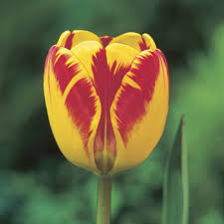

In [5]:
# Try the model with some image from the web 
urllib.request.urlretrieve(
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-E7boOq25EVzmEcpPTRT_WCGfHk4KSaUJOg&usqp=CAU",
    "flower.png")

flower = Image.open("flower.png").resize(IMAGE_SHAPE)
flower

In [6]:
# Normalize
ostrich = np.array(ostrich)/255.
ostrich.shape

(224, 224, 3)

In [7]:
# Normalize
flower = np.array(flower)/255.
flower.shape

(224, 224, 3)

In [8]:
# Collect the 2 images together
test_set = np.array([flower, ostrich])
test_set.shape

(2, 224, 224, 3)

In [9]:
# The ImageNet classifiers understands those as a type of flower and an ostrich
y_pred = classifier.predict(test_set)
pred_labels = list(np.argmax(y_pred, axis=1))
[imagenet_labels[i] for i in pred_labels]

["yellow lady's slipper", 'ostrich']

In [10]:
# BUT the flower was supposed to be a tulip! 
# And tulip is not a class in the original classifier!
"tulip" in imagenet_labels

False

In [11]:
# Load some other flowers images with their labels
data_dir = pathlib.Path("./flowers")

pictures = [list(data_dir.glob('daisy/*')), 
            list(data_dir.glob('rose/*')),
            list(data_dir.glob('tulip/*')),
            list(data_dir.glob('dandelion/*')),
            list(data_dir.glob('sunflower/*'))]

flowers = ['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']

num_of_classes = 5

In [12]:
# Prepare train and test set of the new images
X, y = [], []

for i, images in enumerate(pictures):
    for image in images:
        img = Image.open(str(image)).resize(IMAGE_SHAPE)
        X.append(np.array(img))
        y.append(i)
        
X = np.array(X) / 255.
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, 
                                                    shuffle=True, random_state=0)

In [13]:
# How does the imagenet classifier perform on the flowers?
y_pred = classifier.predict(X_test)
pred_labels = list(np.argmax(y_pred, axis=1))
cmp = zip([imagenet_labels[i] for i in pred_labels], [flowers[i] for i in y_test])
list(cmp)

[('daisy', 'dandelion'),
 ('plastic bag', 'rose'),
 ('mailbox', 'tulip'),
 ('daisy', 'daisy'),
 ('daisy', 'sunflower'),
 ('daisy', 'sunflower'),
 ('pretzel', 'tulip'),
 ('ear', 'dandelion'),
 ('pot', 'rose'),
 ('daisy', 'sunflower'),
 ('mitten', 'tulip'),
 ('daisy', 'daisy'),
 ('picket fence', 'tulip'),
 ('bee', 'sunflower'),
 ('white stork', 'daisy'),
 ('head cabbage', 'rose'),
 ('feather boa', 'dandelion'),
 ('daisy', 'daisy'),
 ('plastic bag', 'rose'),
 ('sea urchin', 'dandelion'),
 ('daisy', 'daisy'),
 ('torch', 'sunflower'),
 ('mushroom', 'dandelion'),
 ('viaduct', 'sunflower'),
 ('rapeseed', 'dandelion'),
 ('daisy', 'dandelion'),
 ('greenhouse', 'tulip'),
 ('daisy', 'tulip'),
 ('daisy', 'tulip'),
 ('sea urchin', 'dandelion'),
 ('daisy', 'daisy'),
 ('daisy', 'daisy'),
 ('rapeseed', 'sunflower'),
 ('ping-pong ball', 'tulip'),
 ('cardoon', 'dandelion'),
 ('daisy', 'sunflower'),
 ('bonnet', 'sunflower'),
 ('velvet', 'rose'),
 ('picket fence', 'tulip'),
 ('daisy', 'dandelion'),
 ('dai

In [14]:
# TRANSFER LEARNING with freezed layers
model = tf.keras.Sequential([
    hub.KerasLayer(model_url, input_shape=(224, 224, 3), trainable=False),
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
Total params: 3,545,275
Trainable params: 5,010
Non-trainable params: 3,540,265
_________________________________________________________________


In [15]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train, y_train, epochs=7,
          # x_test and y_test are used for monitoring only, NOT for training
          verbose=True, validation_data=(X_test, y_test))

Epoch 1/7
14/14 [==============================] - 107s 8s/step - loss: 2.1964 - acc: 0.2506 - val_loss: 1.2385 - val_acc: 0.5280
Epoch 2/7
14/14 [==============================] - 96s 7s/step - loss: 0.8700 - acc: 0.6682 - val_loss: 0.7856 - val_acc: 0.7128
Epoch 3/7
14/14 [==============================] - 99s 8s/step - loss: 0.5570 - acc: 0.7889 - val_loss: 0.6787 - val_acc: 0.7550
Epoch 4/7
14/14 [==============================] - 94s 7s/step - loss: 0.4143 - acc: 0.8445 - val_loss: 0.6306 - val_acc: 0.7859
Epoch 5/7
14/14 [==============================] - 93s 7s/step - loss: 0.3147 - acc: 0.8886 - val_loss: 0.6065 - val_acc: 0.7877
Epoch 6/7
14/14 [==============================] - 94s 7s/step - loss: 0.2605 - acc: 0.9234 - val_loss: 0.5836 - val_acc: 0.8029
Epoch 7/7
14/14 [==============================] - 94s 7s/step - loss: 0.2203 - acc: 0.9490 - val_loss: 0.5718 - val_acc: 0.8065


              precision    recall  f1-score   support

           0       0.81      0.80      0.81       689
           1       0.78      0.78      0.78       703
           2       0.79      0.78      0.79       887
           3       0.84      0.89      0.86       941
           4       0.80      0.75      0.77       666

    accuracy                           0.81      3886
   macro avg       0.80      0.80      0.80      3886
weighted avg       0.81      0.81      0.81      3886

[[552  13  31  60  33]
 [ 12 551  95  16  29]
 [ 16 121 695  25  30]
 [ 41  11  20 837  32]
 [ 59  10  34  64 499]]
0.8064848172928462


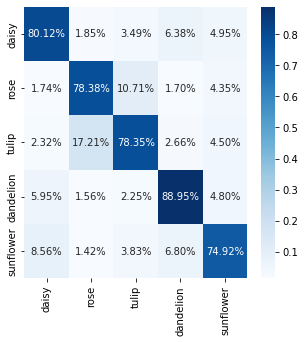

In [16]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

confusion_ma = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(confusion_ma)
print(accuracy_score(y_test, y_pred))


fig = plt.figure(figsize=(num_of_classes, num_of_classes))
sns.heatmap(confusion_ma/np.sum(confusion_ma, axis=1), annot=True, fmt='.2%', cmap='Blues',
            xticklabels=flowers, yticklabels=flowers)
plt.show()

In [17]:
# Now the classifier recognizes the tulip!
y_pred = model.predict(flower[np.newaxis, ...])
y_pred = np.argmax(y_pred)

flowers[y_pred]

'tulip'